# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [3]:
# naložimo paket
import pandas as pd
# ta paket je lahko uporaben, ampak ga tukaj ne bomo rabili:
# import matplotlib.pyplot as plt
import numpy as np

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.set_option("display.max_rows", 10)

# izberemo interaktivni "notebook" stil risanja
%matplotlib notebook

# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv(r'../../02-zajem-podatkov\predavanja\obdelani-podatki\filmi.csv')

Poglejmo si podatke.

In [4]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [8]:
filmi.sort_values('ocena', ascending=False)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
4058,252487,Hababam Sinifi,87,1975,9.3,NaN,36468,NaN,NaN,"Lazy, uneducated students share a very close b..."
2734,111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2293163,28341469.0,R,Two imprisoned men bond over a number of years...
908,68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...
9355,5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...
9815,7738784,Peranbu,147,2018,9.0,NaN,11866,NaN,NaN,"A single father tries to raise his daughter, w..."
...,...,...,...,...,...,...,...,...,...,...
9505,5988370,Reis,108,2017,1.4,NaN,72207,NaN,NaN,A drama about the early life of Recep Tayyip E...
9513,6038600,Smolensk,120,2016,1.4,NaN,7630,NaN,NaN,Inspired by true events of 2010 Polish Air For...
8983,4009460,Saving Christmas,79,2014,1.4,18.0,14855,2783970.0,PG,His annual Christmas party faltering thanks to...
9825,7886848,Sadak 2,133,2020,1.1,NaN,57957,NaN,NaN,"The film picks up where Sadak left off, revolv..."


Poberite stolpec ocen.

In [9]:
filmi.ocena

0       6.3
1       7.7
2       7.3
3       8.1
4       8.3
       ... 
9995    5.8
9996    6.3
9997    6.6
9998    7.3
9999    6.6
Name: ocena, Length: 10000, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [7]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))
# Series je "pameten seznam", DataFrame pa je bolj uporaben tip podatkov.
# Nepriporočljivo, ampak včasih uporabno: List(Series) - dobimo Pythonov slovar
# DataFrame je "slovar stolpcev"

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [10]:
round(filmi.ocena)
# Če funkcija nekaj vrne, je stara stvar nespremenjena.
# Če ne vrne ničesar (vrne None), se stara stvar spremeni (kot python listi).

0       6.0
1       8.0
2       7.0
3       8.0
4       8.0
       ... 
9995    6.0
9996    6.0
9997    7.0
9998    7.0
9999    7.0
Name: ocena, Length: 10000, dtype: float64

Dodajte zaokrožene vrednosti v podatke.

In [89]:
filmi["zaokrozeno"] = round(filmi.ocena)
# Ničesar ne vrne -> najbrž je spremenil

Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [90]:
filmi.drop(columns='zaokrozeno')
# Vrne novo tabelo -> stara je najbrž nespremenjena -> tabela filmi ima še vedno stolpec zaokrozeno

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [27]:
novo = filmi[["naslov", "leto", "glasovi"]].copy()
novo["ocena"] = round(filmi.ocena)
novo

,naslov,leto,glasovi,ocena
0,The Birth of a Nation,1915,22363,6.0
1,Intolerance: Love's Struggle Throughout the Ages,1916,13970,8.0
2,Broken Blossoms or The Yellow Man and the Girl,1919,9296,7.0
3,Das Cabinet des Dr. Caligari,1920,56089,8.0
4,The Kid,1921,110278,8.0
...,...,...,...,...
9995,A Fall from Grace,2020,10414,6.0
9996,Sputnik,2020,8285,6.0
9997,Bulbbul,2020,8381,7.0
9998,Raat Akeli Hai,2020,12232,7.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [93]:
filmi[filmi.leto < 1930]
filmi[filmi.leto > 2017]
filmi[(filmi.leto < 1930) | (filmi.leto > 2017)]   # vrne tabelo z vrsticami, kjer je pogoj True (iz originalne tabele odstrani tiste vrstice, kjer pogoj ne velja)

filmi["leto"] < 1960   # vrne bool tabelo

0        True
1        True
2        True
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: leto, Length: 10000, dtype: bool

Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [40]:
def krajse_od_dve(str):
    return " " not in str
def dve(str):
    return s.count(" ") <= 1
# Funkcijo lahko definiramo tudi s splitom in pogledamo dolžino seznama - bolje za neurejene podatke (zgornja funkcija v nizu "Ab  cd" vidi 3 besede (2 presledka), split pa 2 (2 elementa v seznamu [Ab, cd]))
filmi[(filmi.ocena >= 8) & (filmi.naslov).apply(dve)]

# Drug način:
nad_8 = filmi["ocena"] > 8
kratki = filmi["naslov"].apply(dve)
izbran_bitmask = nad_8 & kratki   # Nujno &, ne and
moji_filmi = filmi[izbran_bitmask]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozeno
5,12364,Körkarlen,107,1921,8.1,NaN,10158,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
14,15881,Greed,140,1924,8.1,NaN,8940,161800.0,NaN,The sudden fortune won from a lottery fans suc...,8.0
19,17136,Metropolis,153,1927,8.3,98.0,157244,1236166.0,NaN,In a futuristic city sharply divided between t...,8.0
20,17925,General,67,1926,8.1,NaN,79375,1033895.0,NaN,When Union spies steal an engineer's beloved l...,8.0
22,18455,Svitanje,94,1927,8.1,NaN,46299,539540.0,NaN,An allegorical tale about a man fighting the g...,8.0
...,...,...,...,...,...,...,...,...,...,...,...
9892,8503618,Hamilton,160,2020,8.7,90.0,43440,NaN,PG-13,The real life of one of America's foremost fou...,9.0
9898,8579674,1917,119,2019,8.3,78.0,375975,159227644.0,R,"April 6th, 1917. As a regiment assembles to wa...",8.0
9934,9052870,Chhichhore,143,2019,8.2,NaN,30459,898575.0,NaN,"A tragic incident forces Anirudh, a middle-age...",8.0
9957,9477520,Asuran,141,2019,8.5,NaN,8974,NaN,NaN,The teenage son of a farmer from an underprivi...,8.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [108]:
ocene = filmi.groupby("ocena").size()
ocene_zaokrozene = filmi.groupby("zaokrozeno").count()["ocena"]
filmi.groupby("zaokrozeno").count()["ocena"].plot.hist()

<AxesSubplot: xlabel='leto', ylabel='Frequency'>

In [110]:
ocene_zaokrozene.plot.hist()

<AxesSubplot: xlabel='leto', ylabel='Frequency'>

Naredite stolpični diagram teh podatkov.

In [102]:
ocene.plot.bar()

<AxesSubplot: xlabel='ocena', ylabel='Frequency'>

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

In [103]:
filmi["ocena"].hist()

<AxesSubplot: xlabel='ocena', ylabel='Frequency'>

### Izris povprečne dolžine filma glede na leto

<IPython.core.display.Javascript object>


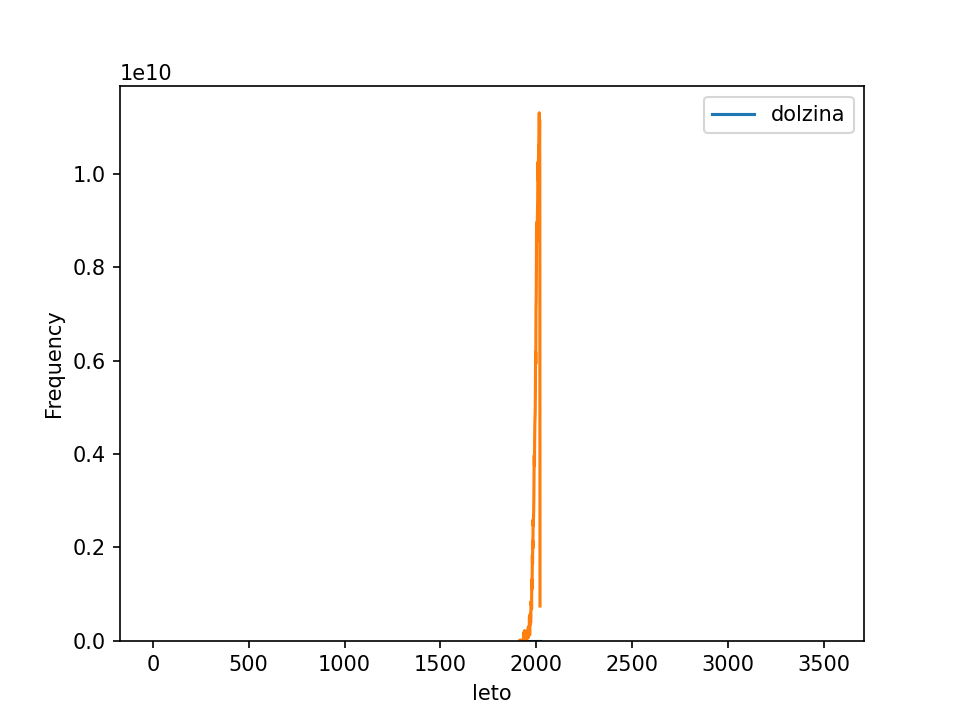

<AxesSubplot: xlabel='leto'>

In [104]:
leta = filmi.groupby("leto").mean(numeric_only=True)
l = leta[["dolzina"]]
l.plot()

### Izris skupnega zasluzka za posamezno leto

In [105]:
leta2 = filmi.groupby("leto").sum(numeric_only=True)
l2 = leta2["zasluzek"]
l2.plot()

<AxesSubplot: xlabel='leto'>